# Monte Carlo Sampling Technique
This technique (numerical method) is used to produce data that come from a specific continuous distribution. It is widely use due to the limitation of the computer when dealing with continuous distribution function. This technique involve using the inverse CDF and uniform distribution. As we know that the CDF function is showing

$$ CDF(Y) = Prob(Y \le y)$$

For a continuous distribution \$ f(y) \$, we can further expand this idea to find the CDF of Y between a specific value

$$ CDF(a \le Y \le b) = Prob(a \le Y \le b) = \ \int_{a}^{b} f(y) \delta y $$

If we squeeze this interval to a very small interval, the \$ f(y) \$ can be approximated using the uniform distribution. 

$$  Prob(F(x) < Y < F(x+\Delta x)) = \ \int_{x}^{x+\Delta x} f(y) \delta y \approx f(y) \delta y$$

The following simulation will show how this technique works. We will use exponential distribution(\$ \lambda = 2 \$) and after generate the data using Monte Carlo technique, we'll compare the data with the actual data using quantile plot. 


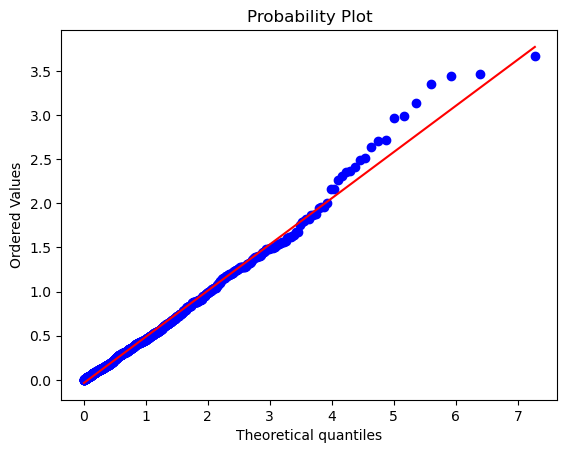

In [5]:
%matplotlib inline

from scipy.stats import expon, uniform
import numpy as np
import pandas as pd
from scipy.stats import probplot
import matplotlib.pyplot as plt
import pylab

a=2 #Setting lambda for our exponential distribution
n=1000 #No. of sample
rv=uniform(0,1)

x = pd.DataFrame({"x_val":rv.rvs(size=n)})

Finv = lambda x: 1/a * np.log(1/(1-x)) #Inverse of exponential distribution

gen_data = x["x_val"].apply(Finv) #This is the generated data of an exponential distribution by using Monte Carlo Sampling

##checking quantile plot
probplot(gen_data, dist='expon', plot=pylab)
pylab.show()


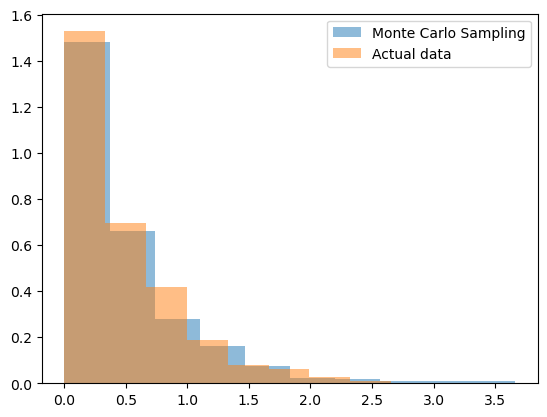

In [8]:
##comparing with actual exponential data using Scipy package
actual = expon.rvs(scale=1/a, size=n)

fig,ax = plt.subplots()
plt.hist(gen_data, density=True, alpha=0.5, label="Monte Carlo Sampling")
plt.hist(actual, density=True, alpha=0.5, label="Actual data")
plt.legend()
plt.show()

Observe the similarity between these 2 histograms. 

Why this is important? Let's say our data is coming from a continuous distribution such as 
$$ f(y) =  e^{(- \frac{(x-1)^2}{2x})} * \frac{(x+1)}{12}, $$ 
sometimes we will not have a suitable libraries package that can generate random data that coming from such distribution \$ f(y) \$. However, the Monte Carlo Sampling tool can help us achieve this.

### Rejection method

In case the inverse function of our distribution did not exist, one remedy towards this technique is the rejection method. The idea is to generate two type of random number that coming from 2 distributions, one will be used to generate a region that encapsulates our distribution function and another one is data coming from a uniform distribution. The later will be used as an accept-reject tool to filter out any data that lies outside the desired distribution function.

Consider this function again
$$ f(y) =  e^{(- \frac{(x-1)^2}{2x})} * \frac{(x+1)}{12}, $$ 

We will generate the data from 2 uniform distributions.

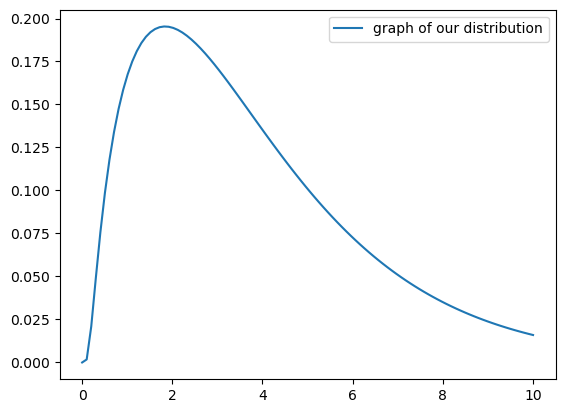

In [19]:
x = np.linspace(0.001, 10, 100)
f = lambda x:  np.exp(-((x-1)**2)/(2*x))*(x+1)/12
fx = f(x)

fig, ax = plt.subplots()
plt.plot(x,fx, label="graph of our distribution")
plt.legend()
plt.show()

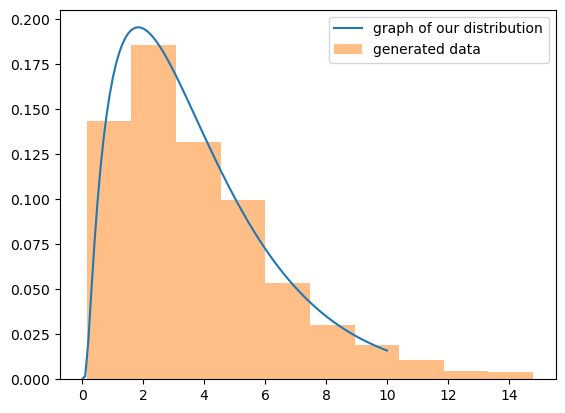

In [20]:
M = 0.3 #scale factor
u1 = np.random.rand(10000)*15 #first uniform distribution used to create a square region that contain fx
u2 = np.random.rand(10000) #second uniform distribution used to filter out data of u1 that exceed the fx

idx, = np.where(u2<=f(u1)/M) #creating filter

gen_data = u1[idx] #generated data from Monte Carlo Sampling - rejection method

fig, ax = plt.subplots()
plt.plot(x,fx, label="graph of our distribution")
plt.hist(gen_data, density=True, alpha=0.5, label="generated data")
plt.legend()
plt.show()